<a href="https://colab.research.google.com/github/adarsh-sharma6218/Diabetic-Retinopathy-Detection/blob/master/Diabetic_Retinopathy_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#**Diabetic Retinopathy Detection** 
# Group members: Harshit Joshi, Adarsh Sharma, Dilan Setiya and Antara Ganapathy

##Importing the libraries

In [ ]:
# Import libraries 

import os
import cv2
import pathlib
import matplotlib.pyplot as plt
from keras.applications.inception_resnet_v2 import *
import tensorflow as tf
from keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from keras.preprocessing.image import load_img
from skimage import measure
import numpy as np
import pandas as pd
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

##Downloading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Unzipping the zip file Dataset_DR

In [ ]:
# !unzip "/content/drive/MyDrive/FutureScool_Project/Dataset_DR.zip" -d "/content/drive/MyDrive/FutureScool_Project/"

##Loading the data

Reading the scores for the images in the training data using 
```pd.read_csv()```

Cleaning the csv file by removing the columns with 100% null data, names as 'Unnamed'

Having a look at the csv file using ```head()```


In [ ]:
train_labels = pd.read_csv('/content/drive/MyDrive/FutureSchool_Project/B. Disease Grading/2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv')
for i in range(3,12):
  del train_labels['Unnamed: '+str(i)]
train_labels.head(10)

,Image name,Retinopathy grade,Risk of macular edema
0,IDRiD_001,3,2
1,IDRiD_002,3,2
2,IDRiD_003,2,2
3,IDRiD_004,3,2
4,IDRiD_005,4,0
5,IDRiD_006,4,1
6,IDRiD_007,4,0
7,IDRiD_008,4,2
8,IDRiD_009,3,2
9,IDRiD_010,4,1


Reading the scores for the images in the test data using 
```pd.read_csv()```

Having a look at the csv file using ```head()```


In [ ]:
test_labels = pd.read_csv('/content/drive/MyDrive/FutureSchool_Project/B. Disease Grading/2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv')
test_labels.head(10)

,Image name,Retinopathy grade,Risk of macular edema
0,IDRiD_001,4,0
1,IDRiD_002,4,1
2,IDRiD_003,4,0
3,IDRiD_004,4,0
4,IDRiD_005,4,1
5,IDRiD_006,3,1
6,IDRiD_007,3,0
7,IDRiD_008,2,2
8,IDRiD_009,2,2
9,IDRiD_010,2,2


##Having a look at the data

### Are there any null values in train_labels and test_labels?


In [ ]:
# Are there any null values in train_labels?
train_labels.isnull().any()

Image name                False
Retinopathy grade         False
Risk of macular edema     False
dtype: bool

In [ ]:
# Are there any null values in test_labels?
test_labels.isnull().any()

Image name                False
Retinopathy grade         False
Risk of macular edema     False
dtype: bool

*From this we can see that there are no null values in both train_labels and test_labels*

###What is the percentage of occurence of each retinopathy grade for train_labels?

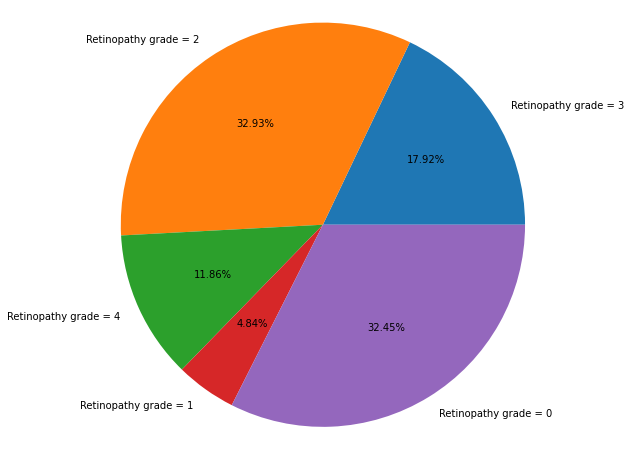

In [ ]:
# Pie chart

# Finding the occurence of each unique retinopathy score
reti_unique = train_labels['Retinopathy grade'].unique()
reti_dict = {}
reti_score_count = 0
reti_count = train_labels['Retinopathy grade'].count()

# Storing the values in the dictionaries
for i in reti_unique:
  reti_score_count=(train_labels['Retinopathy grade']==i).sum()
  reti_dict['Retinopathy grade = '+str(i)]=(reti_score_count/reti_count)*100
fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(8,8)

# Data
label1 = reti_dict.keys()
values1 = reti_dict.values()

ax.pie(values1, labels=label1, autopct='%1.2f%%')
ax.axis('equal')
plt.show()

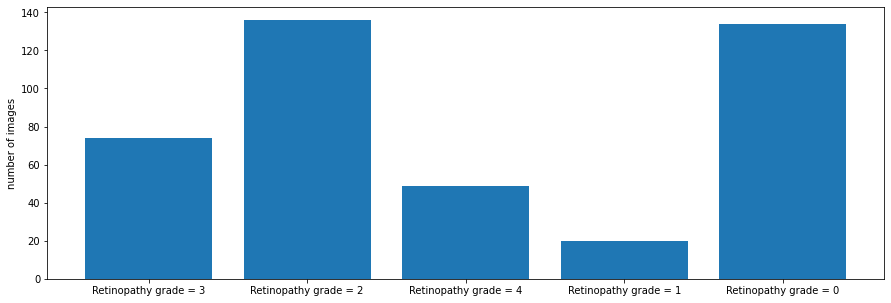

In [ ]:
# Bar graph

# Finding the occurence of each unique retinopathy score
reti_unique5 = train_labels['Retinopathy grade'].unique()
reti_dict5 = {}
reti_score_count5 = 0
reti_count5 = train_labels['Retinopathy grade'].count()
for i in reti_unique5:
  reti_score_count5=(train_labels['Retinopathy grade']==i).sum()
  reti_dict5['Retinopathy grade = '+str(i)]=reti_score_count5
fig = plt.figure(figsize = (15, 5))
# Data
label5 = reti_dict5.keys()
values5 = reti_dict5.values()
plt.bar(label5,values5)
plt.ylabel('number of images')
plt.show()



*From these graphs we can infer that a major part of the images in the training data have a retinopathy grade of 2 (32.93%) and 0 (32.45%)*

###What is the percentage of occurence of each retinopathy grade for test_labels?

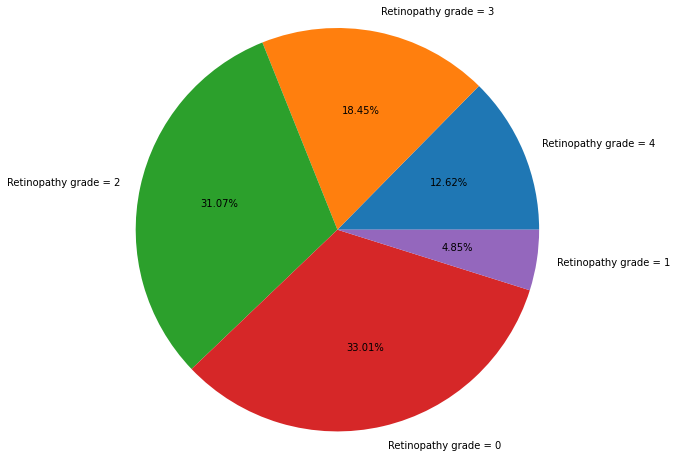

In [ ]:
# Pie chart

# Finding the occurence of each unique retinopathy score
reti_unique2 = test_labels['Retinopathy grade'].unique()
reti_dict2 = {}
reti_score_count2 = 0
reti_count2 = test_labels['Retinopathy grade'].count()

for i in reti_unique2:
  reti_score_count2=(test_labels['Retinopathy grade']==i).sum()
  reti_dict2['Retinopathy grade = '+str(i)]=(reti_score_count2/reti_count2)*100
fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(8,8)

# Data
label2 = reti_dict2.keys()
values2 = reti_dict2.values()

ax.pie(values2, labels=label2, autopct='%1.2f%%')
ax.axis('equal')
plt.show()

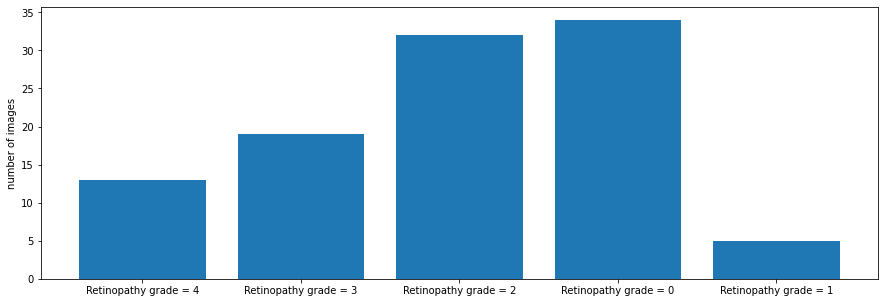

In [ ]:
# Bar graph

# Finding the occurence of each unique retinopathy score
reti_unique7 = test_labels['Retinopathy grade'].unique()
reti_dict7 = {}
reti_score_count7 = 0
reti_count7 = test_labels['Retinopathy grade'].count()
for i in reti_unique7:
  reti_score_count7=(test_labels['Retinopathy grade']==i).sum()
  reti_dict7['Retinopathy grade = '+str(i)]=reti_score_count7
fig = plt.figure(figsize = (15, 5))
# Data
label7 = reti_dict7.keys()
values7 = reti_dict7.values()
plt.bar(label7,values7)
plt.ylabel('number of images')
plt.show()



*From these graphs we can infer that a major part of the images in the testing data have a retinopathy grade of 2 (31.07%) and 0 (33.01%)*

###What is the percentage of occurence of each score of 'Risk of macular edema' in train_labels?

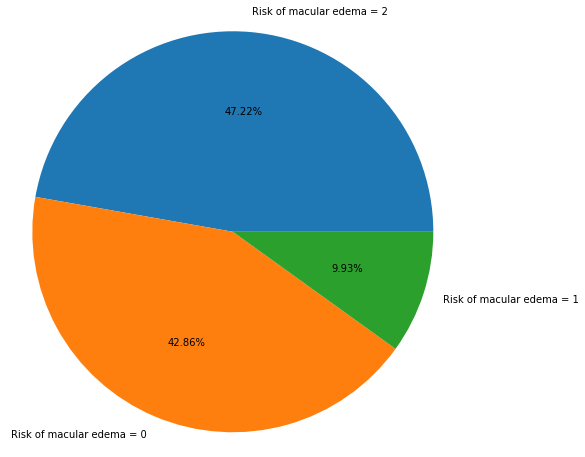

In [ ]:
# Pie chart

# Finding the occurence of each unique risk of macular edema score
reti_unique3 = train_labels['Risk of macular edema '].unique()
reti_dict3 = {}
reti_score_count3 = 0
reti_count3 = train_labels['Risk of macular edema '].count()

for i in reti_unique3:
  reti_score_count3=(train_labels['Risk of macular edema ']==i).sum()
  reti_dict3['Risk of macular edema = '+str(i)]=(reti_score_count3/reti_count3)*100
fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(8,8)

# Data
label3 = reti_dict3.keys()
values3 = reti_dict3.values()

ax.pie(values3, labels=label3, autopct='%1.2f%%')
ax.axis('equal')
plt.show()

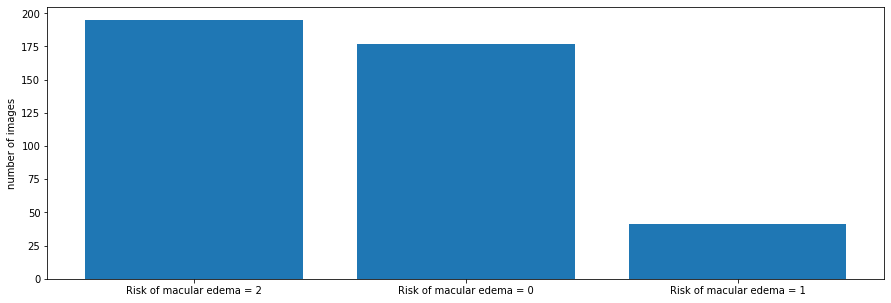

In [ ]:
# Bar graph

# Finding the occurence of each unique risk of macular edema score
reti_unique6 = train_labels['Risk of macular edema '].unique()
reti_dict6 = {}
reti_score_count6 = 0
reti_count6 = train_labels['Risk of macular edema '].count()
for i in reti_unique6:
  reti_score_count6=(train_labels['Risk of macular edema ']==i).sum()
  reti_dict6['Risk of macular edema = '+str(i)]=reti_score_count6
fig = plt.figure(figsize = (15, 5))
# Data
label6 = reti_dict6.keys()
values6 = reti_dict6.values()
plt.bar(label6,values6)
plt.ylabel('number of images')
plt.show()

###What is the percentage of occurence of each score of 'Risk of macular edema' in test_labels?

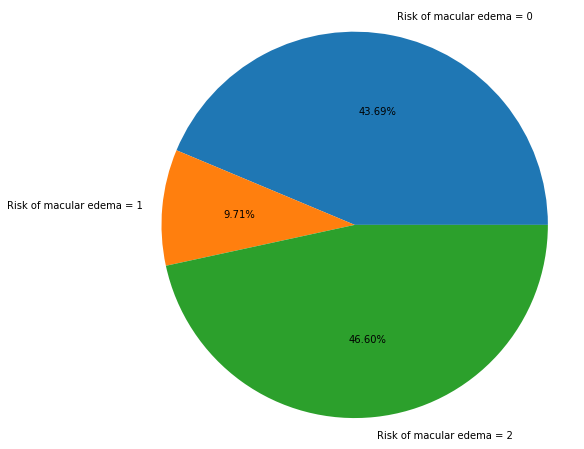

In [ ]:
# Pie chart

# Finding the occurence of each unique retinopathy score
reti_unique4 = test_labels['Risk of macular edema '].unique()
reti_dict4 = {}
reti_score_count4 = 0
reti_count4 = test_labels['Risk of macular edema '].count()

for i in reti_unique4:
  reti_score_count4=(test_labels['Risk of macular edema ']==i).sum()
  reti_dict4['Risk of macular edema = '+str(i)]=(reti_score_count4/reti_count4)*100
fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(8,8)

# Data
label4 = reti_dict4.keys()
values4 = reti_dict4.values()

ax.pie(values4, labels=label4, autopct='%1.2f%%')
ax.axis('equal')
plt.show()

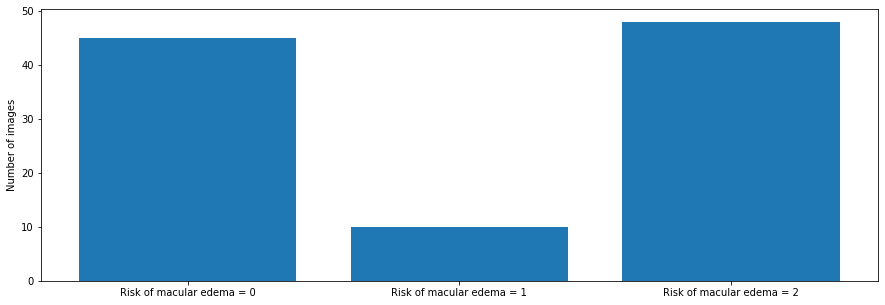

In [ ]:
# Bar graph

# Finding the occurence of each unique retinopathy score
reti_unique8 = test_labels['Risk of macular edema '].unique()
reti_dict8 = {}
reti_score_count8 = 0
reti_count8 = test_labels['Risk of macular edema '].count()
for i in reti_unique8:
  reti_score_count8=(test_labels['Risk of macular edema ']==i).sum()
  reti_dict8['Risk of macular edema = '+str(i)]=reti_score_count8
fig = plt.figure(figsize = (15, 5))
# Data
label8 = reti_dict8.keys()
values8 = reti_dict8.values()
plt.bar(label8,values8)
plt.ylabel('Number of images')
plt.show()



*From these graphs we can infer that a major part of the images in the training data have a risk of macular edema score as 2 (46.6%) and 0 (43.69%)*

###Overview of the dataset

Key: R = Retinopathy grade, M = Risk of macular edema score 



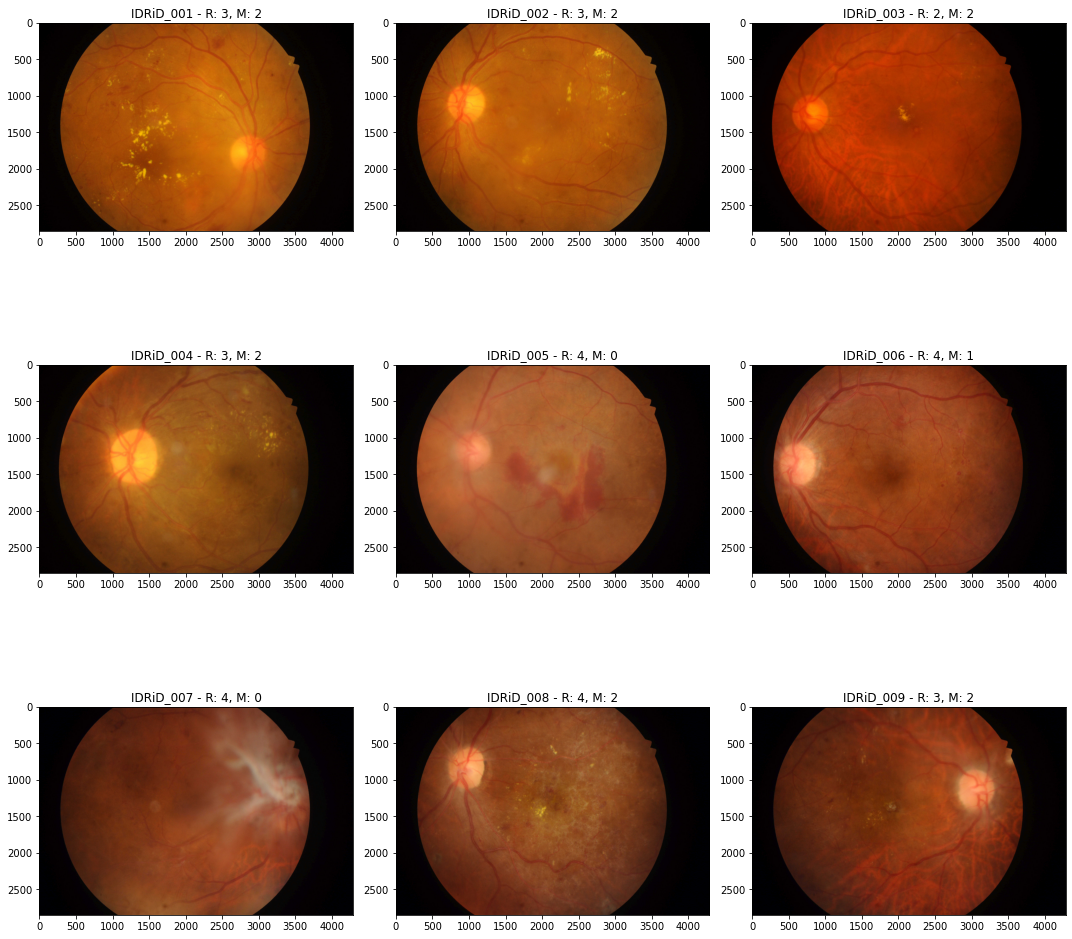

In [ ]:
# Overview of the data

print("Key: R = Retinopathy grade, M = Risk of macular edema score \n")

fig=plt.figure(figsize = (15, 15))
axes=[]
for i in range(1,10):
  img_path='/content/drive/MyDrive/FutureSchool_Project/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_00'+str(i)+'.jpg'
  # img_with_effects = load_ben_color(img_path, sigmaX=10)
  image = plt.imread(img_path)
  axes.append( fig.add_subplot(3, 3, i))
  reti_label = str(train_labels.loc[(i-1),'Retinopathy grade'])
  edema_label = str(train_labels.loc[(i-1),'Risk of macular edema '])  
  axes[-1].set_title('IDRiD_00'+str(i)+' - R: '+reti_label+', M: ' + edema_label)  
  plt.imshow(image)

fig.tight_layout()    
plt.show()

####Overview of the data with gaussian blur


Defining gaussian blur 

In [ ]:
def load_ben_color(path, sigmaX):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
        
    return image

Loading 9 images with gaussian blur and their labels 

Key: R = Retinopathy grade, M = Risk of macular edema score 



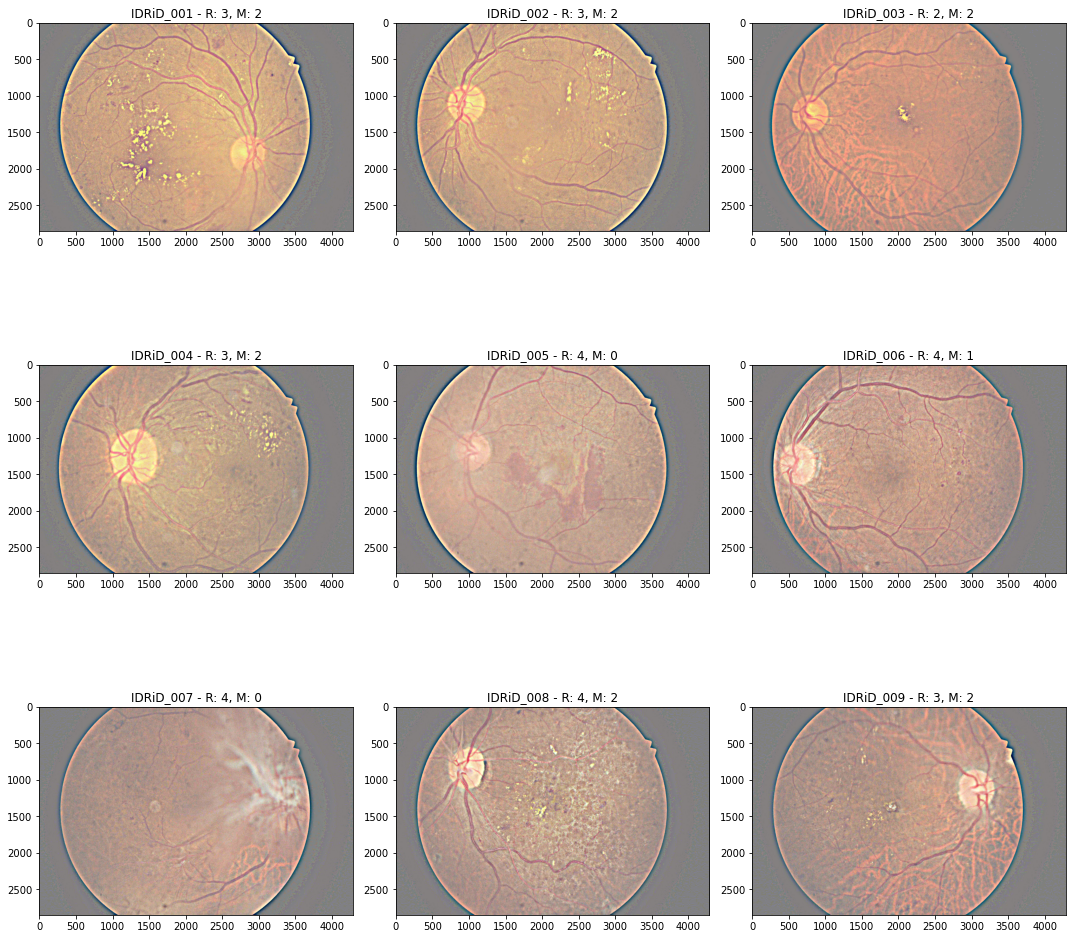

In [ ]:
print("Key: R = Retinopathy grade, M = Risk of macular edema score \n")

fig=plt.figure(figsize = (15, 15))
axes=[]
for i in range(1,10):
  img_path='/content/drive/MyDrive/FutureSchool_Project/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_00'+str(i)+'.jpg'
  img_with_effects = load_ben_color(img_path,30)
  axes.append( fig.add_subplot(3, 3, i))
  reti_label = str(train_labels.loc[(i-1),'Retinopathy grade'])
  edema_label = str(train_labels.loc[(i-1),'Risk of macular edema '])  
  axes[-1].set_title('IDRiD_00'+str(i)+' - R: '+reti_label+', M: ' + edema_label)  
  plt.imshow(img_with_effects)

fig.tight_layout()    
plt.show()

##Model to predict the retinopathy grade (without transfer learning)

Moving the train data images into respective sub-folders based on their retinopathy grade

In [ ]:
# import os,os.path,shutil
# folder_path = '/content/drive/MyDrive/FutureSchool_Project/B. Disease Grading/1. Original Images/a. Training Set/'
# for i in range(len(train_labels['Retinopathy grade'])):
#   old_img_path = os.path.join(folder_path,train_labels['Image name'][i]+'.jpg')
#   new_img_path = os.path.join(folder_path,str(train_labels['Retinopathy grade'][i]),train_labels['Image name'][i]+'.jpg')
#   shutil.move(old_img_path,new_img_path)

Moving the test data images into respective sub-folders based on their retinopathy grade

In [ ]:
# import os,os.path,shutil
# folder_path1 = '/content/drive/MyDrive/FutureSchool_Project/B. Disease Grading/1. Original Images/b. Testing Set/'
# for i in range(len(test_labels['Retinopathy grade'])):
#   old_img_path1 = os.path.join(folder_path1,test_labels['Image name'][i]+'.jpg')
#   new_img_path1 = os.path.join(folder_path1,str(test_labels['Retinopathy grade'][i]),test_labels['Image name'][i]+'.jpg')
#   shutil.move(old_img_path1,new_img_path1)

Defining a function to apply Gaussian blur to our dataset

In [ ]:
def load_ben_color2(img):
    # print(path)
    # image = cv2.imread(path)
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , 100) ,-4 ,128)
    return image

Storing the training and test data

Including validation data as 20% of the training data

In [ ]:
datagen = ImageDataGenerator(preprocessing_function=load_ben_color2,validation_split = 0.2,rescale=1./255)
train_dir = '/content/drive/MyDrive/FutureSchool_Project/B. Disease Grading/1. Original Images/a. Training Set'
X_train = datagen.flow_from_directory(train_dir,target_size=(150, 150),subset='training',class_mode='categorical',classes=['0','1','2','3','4'])

X_val = datagen.flow_from_directory(train_dir, target_size=(150, 150),subset='validation',class_mode='categorical',classes=['0','1','2','3','4'])

test_dir = '/content/drive/MyDrive/FutureSchool_Project/B. Disease Grading/1. Original Images/b. Testing Set'
X_test = datagen.flow_from_directory(test_dir,target_size=(150, 150),class_mode='categorical',classes=['0','1','2','3','4'])


Found 333 images belonging to 5 classes.
Found 80 images belonging to 5 classes.
Found 103 images belonging to 5 classes.


Adding convolution, dense, maxpooling and dropout layers to our model.

In [ ]:
input_shape=(150,150,3)

model = Sequential()

model.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(5,activation = 'softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), metrics=['accuracy'], loss='categorical_crossentropy')

Training the model

In [ ]:
history=model.fit(X_train,epochs=32,batch_size=50,validation_data=X_val)

Plotting the accuracy and loss of the model

In [ ]:
# plt.rcParams["figure.figsize"] = (8, 6)
# fig=plt.figure(figsize = (15, 15))

fig,ax = plt.subplots(1,2,figsize=(16,6))

ax[0].set_title("Loss v/s val_loss")
ax[0].plot(history.history['loss'], label='Train Loss') 
ax[0].plot(history.history['val_loss'], label='Val Loss') 
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('MSE Loss')
ax[0].legend()

ax[1].set_title("Accuracy v/s val_accuracy")
ax[1].plot(history.history['accuracy'], label='Train accuracy') 
ax[1].plot(history.history['val_accuracy'], label='Val accuracy') 
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('MSE Loss')
ax[1].legend()

plt.show()

From these graphs we can infer that the accuracy is 88.64% and the val-accuracy is 0.4875

Testing our model

In [ ]:
score = model.evaluate(X_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

##Model to predict the risk of macular edema (without transfer learning)

Moving the train data images into their respective sub-folders based on their score for risk of macular edema.

In [ ]:
# import os,os.path,shutil
# folder_path2 = '/content/drive/MyDrive/FutureSchool_Project/B. Disease Grading/1. Original Images/Edema_score/'
# for i in range(len(train_labels['Risk of macular edema '])):
#   old_img_path2 = os.path.join(folder_path2,train_labels['Image name'][i]+'.jpg')
#   new_img_path2 = os.path.join(folder_path2,str(train_labels['Risk of macular edema '][i]),train_labels['Image name'][i]+'.jpg')
#   shutil.move(old_img_path2,new_img_path2)

Moving the test data images into respective sub-folders based on their score for risk of macular edema.

In [ ]:
# import os,os.path,shutil
# folder_path3 = '/content/drive/MyDrive/FutureSchool_Project/B. Disease Grading/1. Original Images/Edema_test/'
# for i in range(len(test_labels['Risk of macular edema '])):
#   old_img_path3 = os.path.join(folder_path3,test_labels['Image name'][i]+'.jpg')
#   new_img_path3 = os.path.join(folder_path3,str(test_labels['Risk of macular edema '][i]),test_labels['Image name'][i]+'.jpg')
#   shutil.move(old_img_path3,new_img_path3)

Storing the training and test data

Including validation data as 20% of the training data

In [ ]:
datagen2 = ImageDataGenerator(validation_split = 0.2)
train_dir2 = '/content/drive/MyDrive/FutureSchool_Project/B. Disease Grading/1. Original Images/Edema_score'
X_train2 = datagen2.flow_from_directory(train_dir2,target_size=(150, 150),subset='training',class_mode='categorical',classes=['0','1','2'])

X_val2 = datagen2.flow_from_directory(train_dir2, target_size=(150, 150),subset='validation',class_mode='categorical',classes=['0','1','2'])

test_dir2 = '/content/drive/MyDrive/FutureSchool_Project/B. Disease Grading/1. Original Images/Edema_test'
X_test2 = datagen2.flow_from_directory(test_dir2,target_size=(150, 150),class_mode='categorical',classes=['0','1','2'])


Found 331 images belonging to 3 classes.
Found 82 images belonging to 3 classes.
Found 103 images belonging to 3 classes.


Adding convolution, dense, maxpooling and dropout layers to our model.

In [ ]:
edema_score = Sequential()
input_shape=(150,150,3)
edema_score.add(Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
edema_score.add(MaxPooling2D())
edema_score.add(Conv2D(32,(3,3),activation='relu'))
edema_score.add(MaxPooling2D())
edema_score.add(Dense(50, activation='relu'))
edema_score.add(Dropout(0.5))
edema_score.add(Flatten())
edema_score.add(Dense(3,activation='softmax'))
edema_score.compile(optimizer=Adam(learning_rate=0.001), metrics=['accuracy'], loss='categorical_crossentropy')

Training the model

In [ ]:
history1=edema_score.fit(X_train2,epochs=20,batch_size=50,validation_data=X_val2)

Epoch 1/20
11/11 [==============================] - 155s 15s/step - loss: 58.5171 - accuracy: 0.4971 - val_loss: 7.2899 - val_accuracy: 0.4024
Epoch 2/20
11/11 [==============================] - 52s 5s/step - loss: 4.6556 - accuracy: 0.5481 - val_loss: 2.3765 - val_accuracy: 0.3049
Epoch 3/20
11/11 [==============================] - 53s 5s/step - loss: 2.0436 - accuracy: 0.5560 - val_loss: 2.4811 - val_accuracy: 0.4634
Epoch 4/20
11/11 [==============================] - 54s 5s/step - loss: 1.8384 - accuracy: 0.6038 - val_loss: 1.5263 - val_accuracy: 0.5366
Epoch 5/20
11/11 [==============================] - 53s 5s/step - loss: 0.8067 - accuracy: 0.6886 - val_loss: 1.0758 - val_accuracy: 0.6585
Epoch 6/20
11/11 [==============================] - 53s 5s/step - loss: 0.7861 - accuracy: 0.7235 - val_loss: 1.0538 - val_accuracy: 0.6707
Epoch 7/20
11/11 [==============================] - 53s 5s/step - loss: 0.7904 - accuracy: 0.7011 - val_loss: 1.2613 - val_accuracy: 0.6341
Epoch 8/20
11/11 

Plotting the accuracy and loss of the model

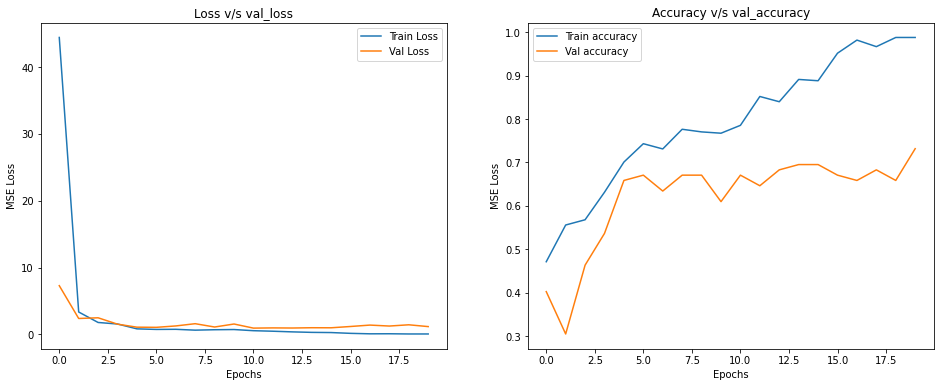

In [ ]:
# plt.rcParams["figure.figsize"] = (8, 6)
# fig=plt.figure(figsize = (15, 15))

fig,ax = plt.subplots(1,2,figsize=(16,6))

ax[0].set_title("Loss v/s val_loss")
ax[0].plot(history1.history['loss'], label='Train Loss') 
ax[0].plot(history1.history['val_loss'], label='Val Loss') 
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('MSE Loss')
ax[0].legend()

ax[1].set_title("Accuracy v/s val_accuracy")
ax[1].plot(history1.history['accuracy'], label='Train accuracy') 
ax[1].plot(history1.history['val_accuracy'], label='Val accuracy') 
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('MSE Loss')
ax[1].legend()

plt.show()

From these graphs we can infer that the accuracy is 98.64% and the val-accuracy is 0.7317

Testing our model

In [ ]:
score2 = edema_score.evaluate(X_test2, verbose = 0) 

print('Test loss:', score2[0]) 
print('Test accuracy:', score2[1])

## Model to predict the retinopathy grade(with Transfer learning)


In [ ]:
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16

In [ ]:
# using images after implementing gaussian blur to make it easier for model to focus on veins

def gaussian_blur(img):
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , 100) ,-4 ,128)
        
    return image

In [ ]:
# As we have limited images, we are using data augmetation to make the model more robust.

datagen_2 = ImageDataGenerator(rescale=1./255,
                                 rotation_range=360,
                                 brightness_range=[0.5, 1.5],
                                 zoom_range=[1, 1.2],
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 fill_mode='constant', preprocessing_function=gaussian_blur,
                                 validation_split =0.2)

In [ ]:
# import os,os.path,shutil
# folder_path = '/content/drive/MyDrive/FutureScool_project/B. Disease Grading/1. Original Images/a. Training Set/'

# folder_path_2 = '/content/drive/MyDrive/FutureScool_project/B. Disease Grading/1. Original Images/b. Testing Set/'

In [ ]:
train_dir='/content/drive/MyDrive/FutureSchool_Project/B. Disease Grading/1. Original Images/a. Training Set'
X_train = datagen_2.flow_from_directory(train_dir,target_size=(150, 150),batch_size=15,class_mode='categorical',classes=['0','1','2','3','4'])

X_val = datagen_2.flow_from_directory(train_dir, target_size=(150, 150),subset='validation',class_mode='categorical',classes=['0','1','2','3','4'])
test_dir='/content/drive/MyDrive/FutureSchool_Project/B. Disease Grading/1. Original Images/b. Testing Set'
X_test = datagen_2.flow_from_directory(test_dir,target_size=(150, 150),batch_size=15,class_mode='categorical',classes=['0','1','2','3','4'])

Found 413 images belonging to 5 classes.
Found 80 images belonging to 5 classes.
Found 103 images belonging to 5 classes.


We tested the model on InceptionV3 and it turns out that it doesn't fit with our data very well. Possible error could be that our data is of size 200mb with 150 * 150 images and using complex model like InceptionV3 may be not a good fit. Hence, we trained our model on VGG-16


Adding the layers to our model

In [ ]:
vgg16_model = VGG16(include_top=False, weights='imagenet')

for layer in vgg16_model.layers[:]:
  vgg16_model.trainable = True 

temp_model = vgg16_model.output
temp_model = GlobalAveragePooling2D()(temp_model)

temp_model = Dense(2048, activation='relu')(temp_model)
temp_model = Dropout(0.5)(temp_model)
temp_model = Dense(1024, activation='relu')(temp_model)
temp_model = Dense(512, activation='relu')(temp_model)
temp_model = Dropout(0.2)(temp_model)
temp_model = Dense(256, activation = 'relu')(temp_model)

final_layer = Dense(5,activation='softmax')(temp_model)
model = Model(inputs=vgg16_model.input, outputs = final_layer)
vgg16_model.summary() 


Compiling our model

In [ ]:
opt = Adam(learning_rate=0.01)
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

Training the model

In [ ]:
epochs=50
history = model.fit(X_train, validation_data=X_val, epochs=epochs

Plotting the accuracy and loss of the model

In [ ]:
plt.rcParams["figure.figsize"] = (8, 6)
plt.title("Simple neural network model")

# Plot the training loss vs Epochs
plt.plot(history.history['loss'], label='Train Loss') # plt.rcParams["figure.figsize"] = (8, 6)
plt.plot(history.history['val_loss'], label='Val Loss') 

plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

Testing our model

In [ ]:
score3 = temp_model.evaluate(X_test, verbose = 0) 

print('Test loss:', score3[0]) 
print('Test accuracy:', score3[1])

##Model to predict risk of macular edema(with Transfer learning)

In [ ]:
datagen_3 = ImageDataGenerator(rescale=1./255,
                                 rotation_range=360,
                                 brightness_range=[0.5, 1.5],
                                 zoom_range=[1, 1.2],
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 fill_mode='constant', preprocessing_function=gaussian_blur,
                                 validation_split =0.2)

In [ ]:
train_dir4 = '/content/drive/MyDrive/FutureSchool_Project/B. Disease Grading/1. Original Images/Edema_score'
X_train4 = datagen_3.flow_from_directory(train_dir4,target_size=(150, 150),subset='training',class_mode='categorical',classes=['0','1','2'])

X_val4 = datagen_3.flow_from_directory(train_dir4, target_size=(150, 150),subset='validation',class_mode='categorical',classes=['0','1','2'])

test_dir4 = '/content/drive/MyDrive/FutureSchool_Project/B. Disease Grading/1. Original Images/Edema_test'
X_test4 = datagen_3.flow_from_directory(test_dir4,target_size=(150, 150),class_mode='categorical',classes=['0','1','2'])


Found 331 images belonging to 3 classes.
Found 82 images belonging to 3 classes.
Found 103 images belonging to 3 classes.


In [ ]:
vgg16_model = VGG16(include_top=False, weights='imagenet')

for layer in vgg16_model.layers[:]:
  vgg16_model.trainable = True 

temp_model = vgg16_model.output
temp_model = GlobalAveragePooling2D()(temp_model)

temp_model = Dense(2048, activation='relu')(temp_model)
temp_model = Dropout(0.5)(temp_model)
temp_model = Dense(1024, activation='relu')(temp_model)
temp_model = Dense(512, activation='relu')(temp_model)
temp_model = Dropout(0.2)(temp_model)
temp_model = Dense(256, activation = 'relu')(temp_model)
final_layer = Dense(5,activation='softmax')(temp_model)

model = Model(inputs=vgg16_model.input, outputs = final_layer)

vgg16_model.summary() 

Compiling our model

In [ ]:
opt = Adam(learning_rate=0.01)
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

Training our model

In [ ]:
epochs=75
history = model.fit(X_train4, validation_data=X_val4, epochs=epochs, batch_size= 30)

Plotting the accuracy and loss of our model

In [ ]:
plt.rcParams["figure.figsize"] = (8, 6)
plt.title("Simple neural network model")

# Plot the training loss vs Epochs
plt.plot(history.history['loss'], label='Train Loss') # plt.rcParams["figure.figsize"] = (8, 6)
plt.plot(history.history['val_loss'], label='Val Loss') 



plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

Testing our model

In [ ]:
score4 = temp_model.evaluate(X_test4, verbose = 0) 

print('Test loss:', score4[0]) 
print('Test accuracy:', score4[1])